In [1]:
#invoking the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [45]:
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score,f1_score
import joblib

In [3]:
data = pd.read_csv("loan_data.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [5]:
data.shape

(381, 13)

In [6]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [8]:
data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#Handling Missing values
data.isnull().mean()*100

Loan_ID              0.000000
Gender               1.312336
Married              0.000000
Dependents           2.099738
Education            0.000000
Self_Employed        5.511811
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.887139
Credit_History       7.874016
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [10]:
data.drop('Loan_ID',axis=1, inplace=True)

In [11]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [12]:
data = data.dropna(subset=["Gender","Dependents","Loan_Amount_Term"])

In [13]:
data.shape

(358, 12)

In [14]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
data["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
data["Self_Employed"].mode()

0    No
Name: Self_Employed, dtype: object

In [17]:
data["Credit_History"].unique()

array([ 1., nan,  0.])

In [18]:
data["Credit_History"].mean()

0.8597560975609756

In [19]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [20]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [22]:
data['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [23]:
data['Dependents'].replace('3+','4',inplace=True)

In [24]:
data['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [25]:
data['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [27]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [28]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
data['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [30]:
data['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             358 non-null    object 
 1   Married            358 non-null    object 
 2   Dependents         358 non-null    object 
 3   Education          358 non-null    object 
 4   Self_Employed      358 non-null    object 
 5   ApplicantIncome    358 non-null    int64  
 6   CoapplicantIncome  358 non-null    float64
 7   LoanAmount         358 non-null    float64
 8   Loan_Amount_Term   358 non-null    float64
 9   Credit_History     358 non-null    float64
 10  Property_Area      358 non-null    object 
 11  Loan_Status        358 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 36.4+ KB


In [31]:
encoder = {
    'Gender':{'Male':1,'Female':0},
    'Married':{'Yes':1,'No':0},
    'Dependents':{'0':0,'1':1,'2':2,'4':4},
    'Education':{'Graduate':1,'Not Graduate':0},
    'Self_Employed':{'Yes':1,'No':0},
    'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2},
    'Loan_Status':{'Y':1,'N':0}
}

In [32]:
data.replace(encoder,inplace=True)

In [33]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
2,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
3,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
4,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,1,1


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             358 non-null    int64  
 1   Married            358 non-null    int64  
 2   Dependents         358 non-null    int64  
 3   Education          358 non-null    int64  
 4   Self_Employed      358 non-null    int64  
 5   ApplicantIncome    358 non-null    int64  
 6   CoapplicantIncome  358 non-null    float64
 7   LoanAmount         358 non-null    float64
 8   Loan_Amount_Term   358 non-null    float64
 9   Credit_History     358 non-null    float64
 10  Property_Area      358 non-null    int64  
 11  Loan_Status        358 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 36.4 KB


In [35]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,0.776536,0.603352,0.762570,0.737430,0.089385,3568.569832,1288.108715,104.826816,340.391061,0.871508,1.106145,0.729050
std,0.417150,0.489886,1.186783,0.440646,0.285699,1427.496937,2391.681503,28.791789,68.700488,0.335105,0.819863,0.445072
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2583.000000,0.000000,90.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3333.000000,984.399994,110.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,4268.250000,2028.750000,128.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,9703.000000,33837.000000,150.000000,480.000000,1.000000,2.000000,1.000000


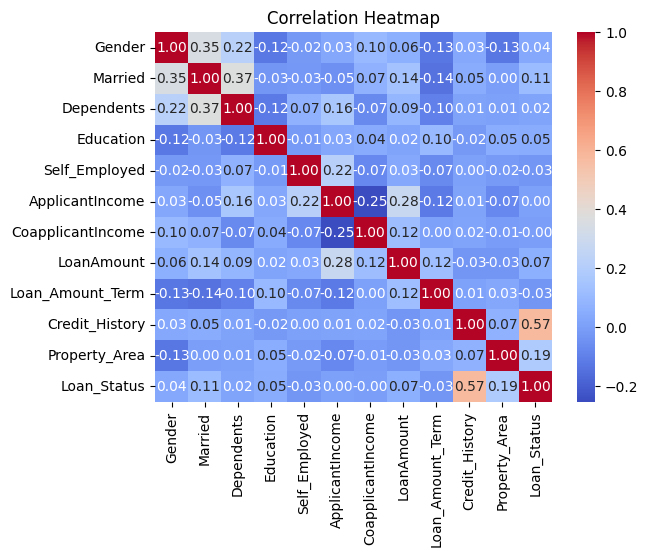

In [38]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

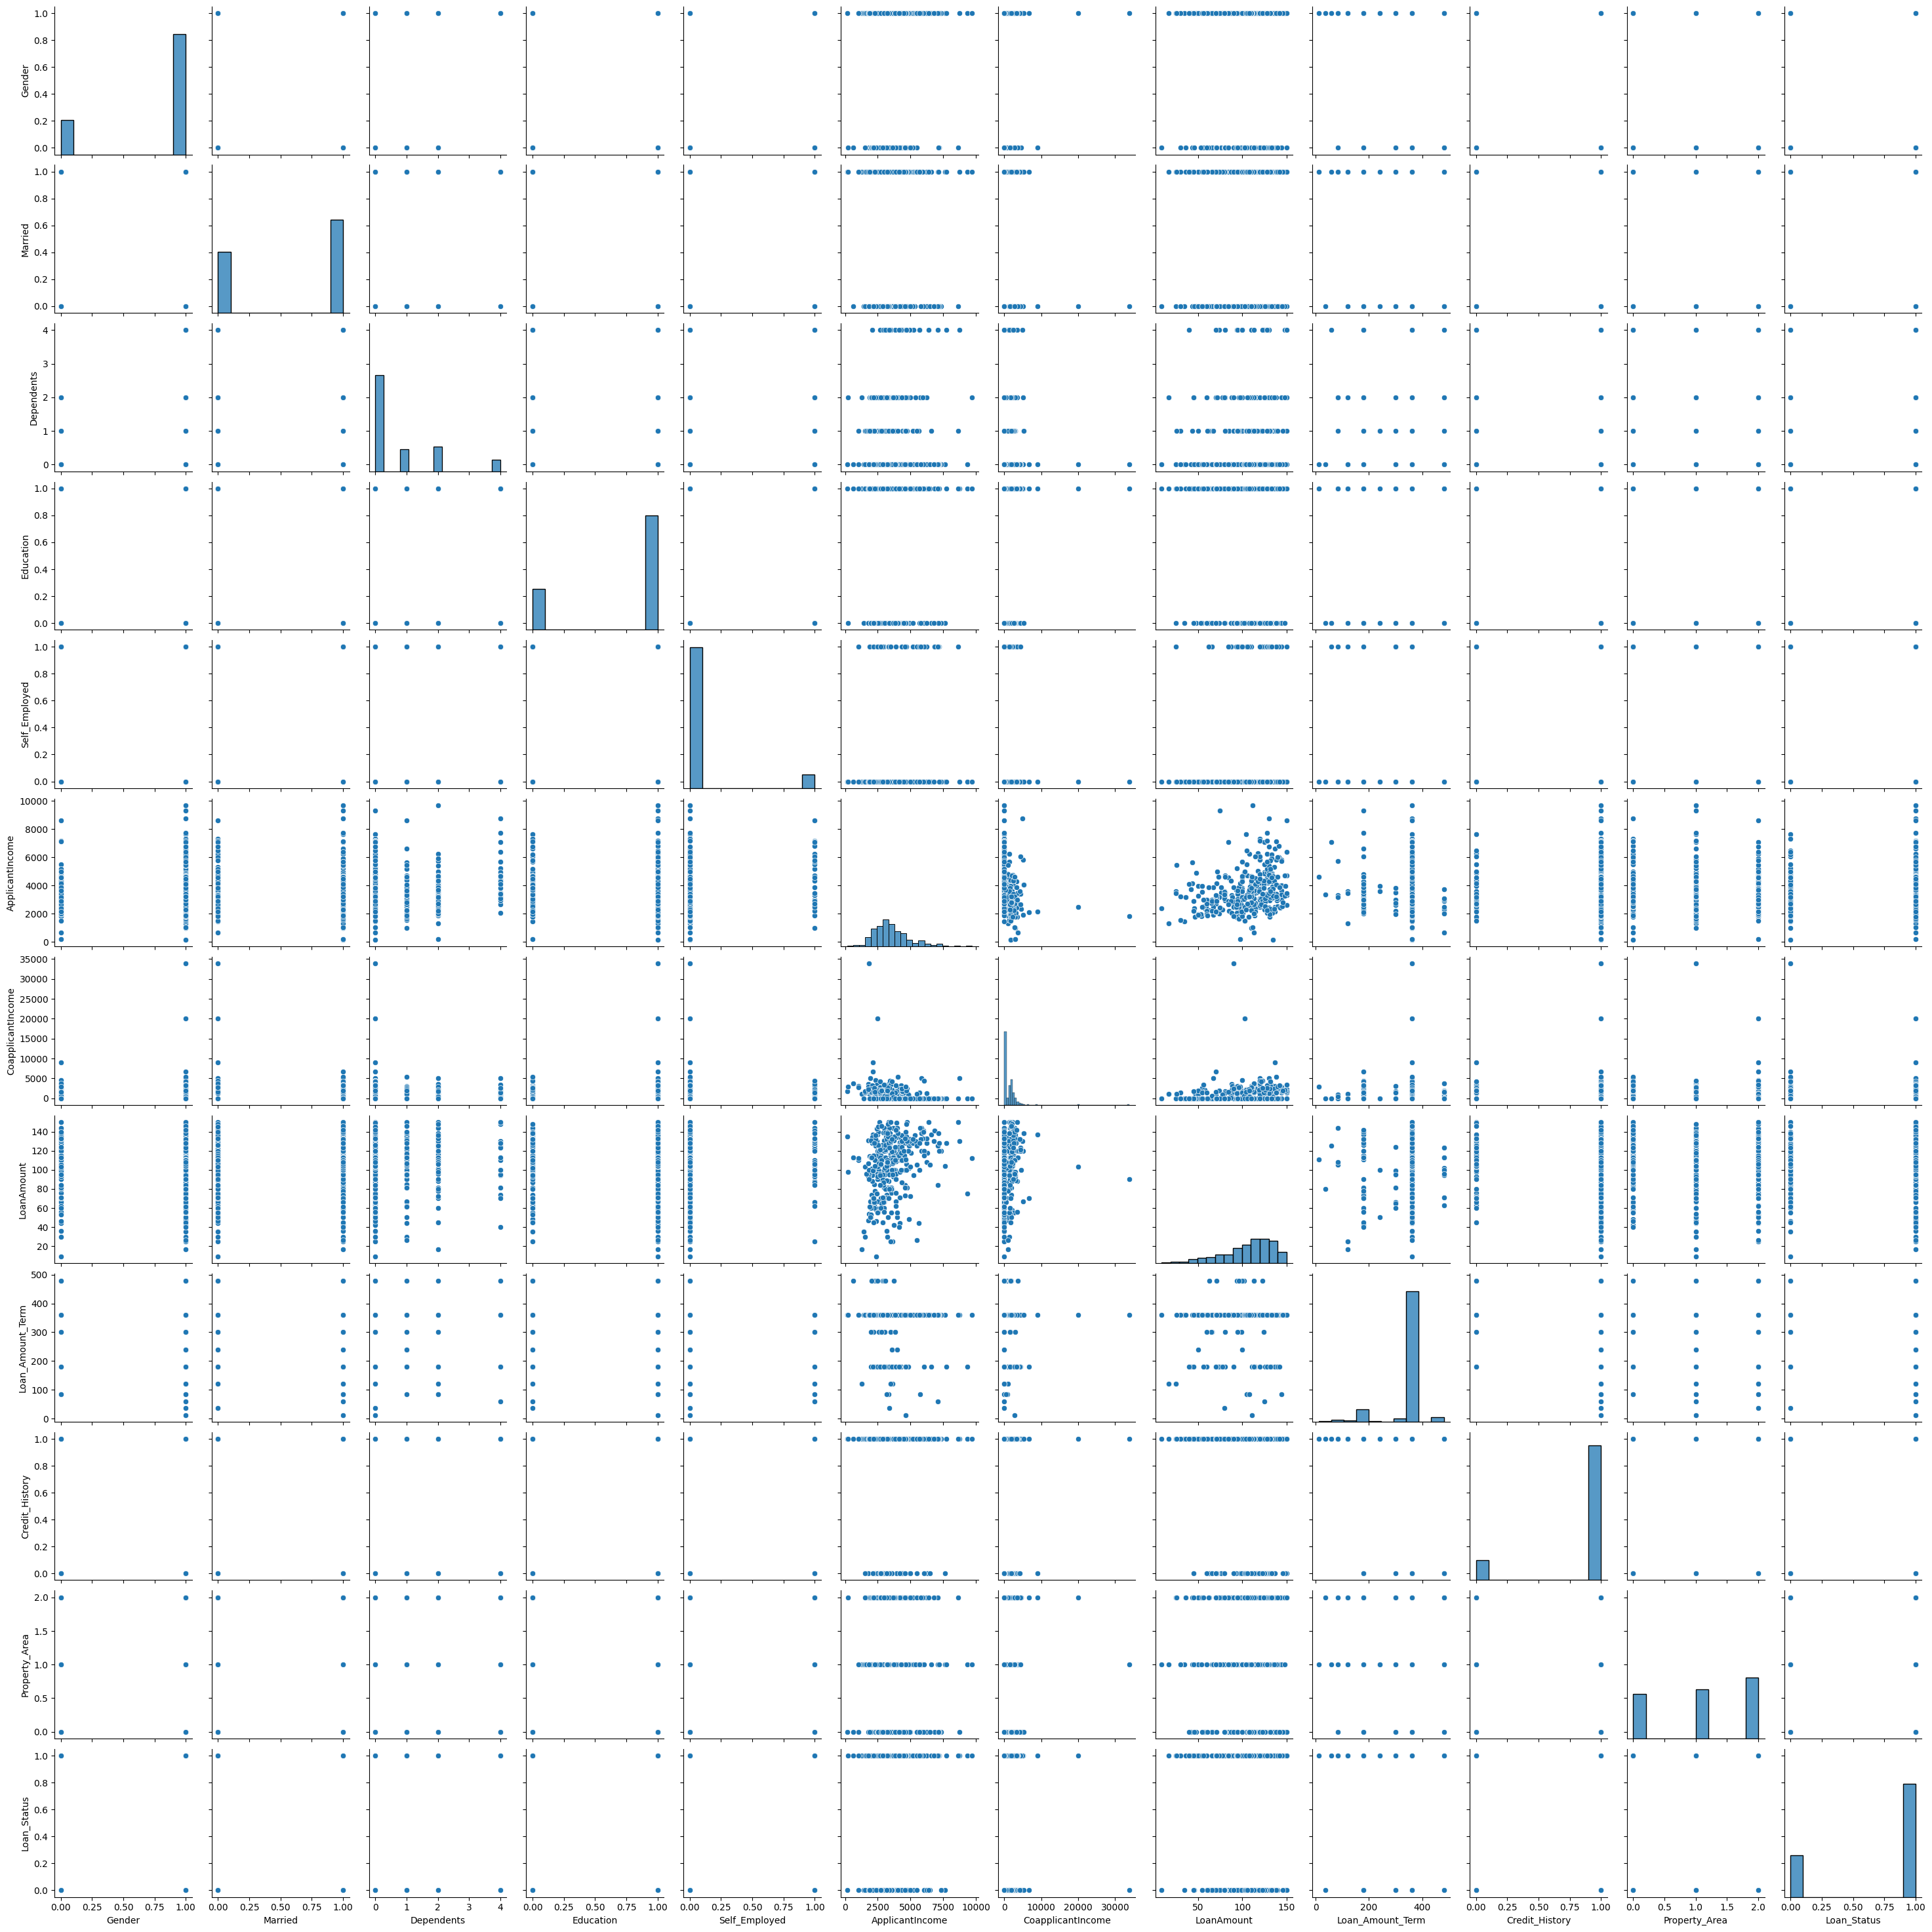

In [40]:
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.show()

In [42]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [43]:
num_cols =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
scaler = StandardScaler()
X[num_cols]=scaler.fit_transform(X[num_cols])

In [44]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,1,1,0,0.711630,0.092069,0.805980,0.285826,1.0,0
1,1,1,0,1,1,-0.398856,-0.539332,-1.350425,0.285826,1.0,1
2,1,1,0,0,0,-0.691384,0.447965,0.527735,0.285826,1.0,1
3,1,0,0,1,0,1.705666,-0.539332,1.258130,0.285826,1.0,1
4,1,1,0,0,0,-0.866761,0.095418,-0.341784,0.285826,1.0,1


In [47]:
def evaluate_model(model):
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cross_val = cross_val_score(model, X, y, cv=5)
    avg_cross_val = np.mean(cross_val)
    print(f"{model.__class__.__name__} - Accuarcy : {accuracy: .2f} , Cross-Val-Score: {avg_cross_val: .2f}")
    return avg_cross_val

In [46]:
models = {
    LogisticRegression(),
    svm.SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
}

In [48]:
model_score = {model.__class__.__name__:evaluate_model(model) for model in models}

GradientBoostingClassifier - Accuarcy :  0.85 , Cross-Val-Score:  0.82
LogisticRegression - Accuarcy :  0.85 , Cross-Val-Score:  0.84
DecisionTreeClassifier - Accuarcy :  0.82 , Cross-Val-Score:  0.78
SVC - Accuarcy :  0.85 , Cross-Val-Score:  0.83
RandomForestClassifier - Accuarcy :  0.82 , Cross-Val-Score:  0.83


In [49]:
def tune_model(model, param_grid):
    tuner = RandomizedSearchCV(model, param_grid, cv = 5, n_iter =20, verbose = True, random_state = 42)
    tuner.fit(X, y)
    print(f"Best Score for {model.__class__.__name__}: {tuner.best_score_:.2f}")
    print(f"Best Parameter for {model.__class__.__name__}: {tuner.best_params_}")
    return tuner.best_estimator_

In [50]:
log_reg_grid = {'C': np.logspace(-4, 4, 20), "solver": ["liblinear"]}
svc_grid = {'C': [0.25, 0.50, 0.75, 1], "kernel": ['linear']}

rf_grid = {
    'n_estimators': np.arange(10, 1000, 10),
    'max_features': ['log2', 'sqrt'], 
    'max_depth': [None, 3, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 20, 50, 100],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [51]:
best_log_reg = tune_model(LogisticRegression(), log_reg_grid)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Score for LogisticRegression: 0.84
Best Parameter for LogisticRegression: {'solver': 'liblinear', 'C': 1.623776739188721}


In [52]:
best_svc_reg = tune_model(svm.SVC(), svc_grid)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Score for SVC: 0.84
Best Parameter for SVC: {'kernel': 'linear', 'C': 0.25}


In [53]:
best_rf = tune_model(RandomForestClassifier(), rf_grid)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Score for RandomForestClassifier: 0.84
Best Parameter for RandomForestClassifier: {'n_estimators': 930, 'min_samples_split': 50, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 30}


In [54]:
final_model = best_rf

In [55]:
joblib.dump(final_model, 'loan_status_predictor.pkl')

['loan_status_predictor.pkl']

In [56]:
# Prediction System

sample_data = pd.DataFrame({
    'Gender': [1],
    'Married': [1],
    'Dependents': [2],
    'Education': [0],
    'Self_Employed': [0],
    'ApplicantIncome': [1000],
    'CoapplicantIncome': [0.0],
    'LoanAmount': [150],
    'Loan_Amount_Term': [180],
    'Credit_History': [0],
    'Property_Area': [1]
})

sample_data[num_cols] = scaler.transform(sample_data[num_cols])
loaded_model = joblib.load('loan_status_predictor.pkl')
prediction = loaded_model.predict(sample_data)

result = "Loan Approved" if prediction[0] == 1 else "Loan Not Approved"
print(f"\nPrediction Result: {result}")


Prediction Result: Loan Not Approved


In [57]:
joblib.dump(scaler, 'vector.pkl')

['vector.pkl']